# 다중회귀와 다중분류

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - (회귀)출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - (분류)출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

# 다중 회귀 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수
- y가 복수의 숫자로 구성된 경우

In [11]:
import scipy.stats
from numpy.random import rand, randn
def gen_random_xy(n_steps=20, show=False):
    level = 0.5 + rand() # 0 ~ 1.5 사이의 임의의 크기 조절
    nd = scipy.stats.norm(3, 1) # 정규 분포형태의 입력 신호 생성
    xs = np.linspace(0,6,n_steps)
    in_x = level*(nd.pdf(xs))
    out = np.cumsum(in_x + 0.1*xs*rand(n_steps))
    if show:
        print('random lebel=', level)
        plt.plot(in_x) ; plt.show()
        plt.plot(out); plt.show()
    return in_x, out

random lebel= 0.7002421449327965


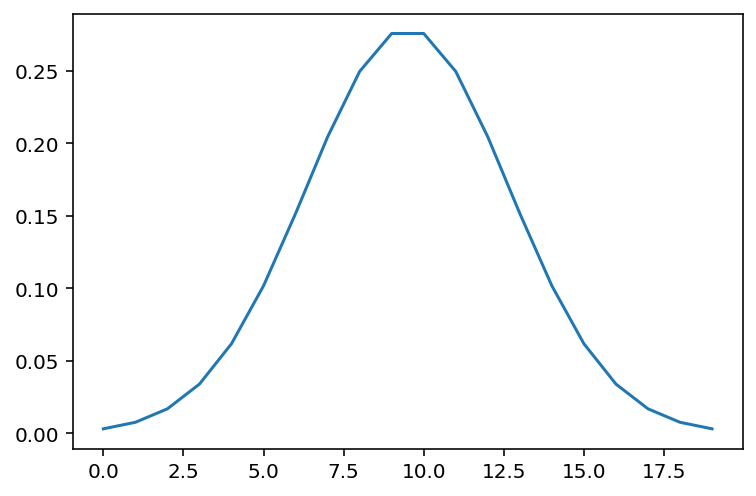

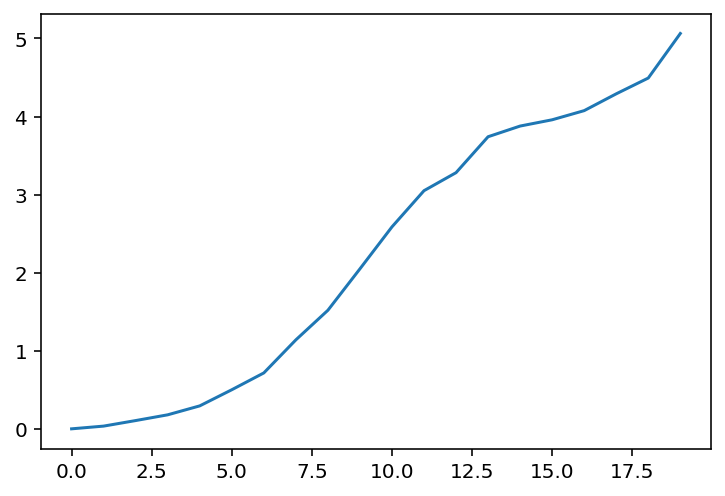

In [12]:
_= gen_random_xy(show=True)

In [23]:
# 입력 및 출력 데이터 샘플 생성
N = 200 # 샘플 수
n_steps = 20
X, y = [],[]
for i in range(N):
    in_x, out = gen_random_xy(n_steps)
    X.append(in_x)
    y.append(out)
X = np.array(X)
y = np.array(y)

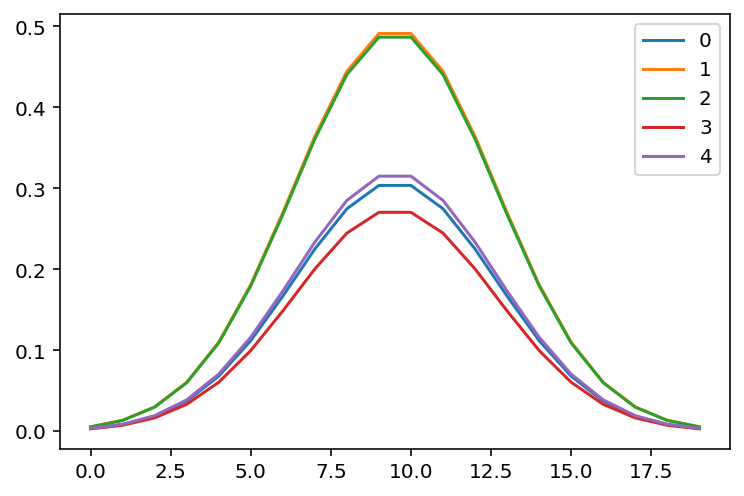

In [24]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()


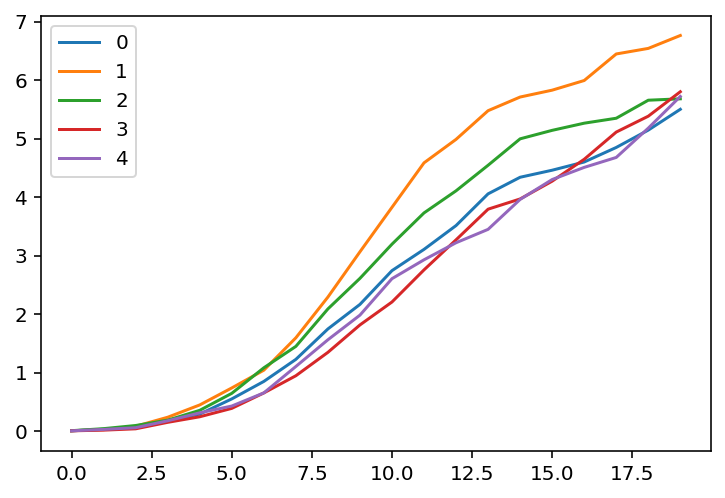

In [25]:
for i in range(5):
    plt.plot(y[i], label=str(i))
    plt.legend()

In [26]:
X.shape, y.shape

((200, 20), (200, 20))

In [27]:
X_all = X.copy()

### 모든 데이터 샘플을 사용한 다중회귀 예측

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=9)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.5221786265002569

## 50개 값의 300개 샘플에 대한 r2 평균치

In [30]:
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred)

0.5221786265002569

## 각 컬럼별 R2 보기

In [31]:
r2_score(y_test, y_pred, multioutput="raw_values")

array([ 0.99982378, -0.18609908, -0.08160975, -0.5429648 , -0.22373658,
        0.09311198,  0.40622724,  0.5939863 ,  0.79761412,  0.80386276,
        0.86462763,  0.85464707,  0.86421235,  0.82862923,  0.85042021,
        0.77687685,  0.76890325,  0.70120243,  0.64207466,  0.63176286])

## 각 행별 R2 보기

In [32]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values")

array([0.98948696, 0.98591832, 0.98277283, 0.99618983, 0.98629881,
       0.9967956 , 0.99202806, 0.99587945, 0.97400076, 0.99441335,
       0.97277034, 0.99538846, 0.98876285, 0.96570755, 0.99637747,
       0.99752819, 0.96523339, 0.99304053, 0.99515938, 0.98699981,
       0.9618055 , 0.99577098, 0.99032532, 0.98491731, 0.98385025,
       0.82604699, 0.98390879, 0.9945806 , 0.99689972, 0.97645676,
       0.99862883, 0.9570685 , 0.96571577, 0.98820571, 0.97873388,
       0.99621212, 0.99474281, 0.92888677, 0.99439004, 0.96867317,
       0.9849078 , 0.97675068, 0.97841934, 0.99517615, 0.94587485,
       0.97805952, 0.99351815, 0.99097576, 0.99594476, 0.95859084])

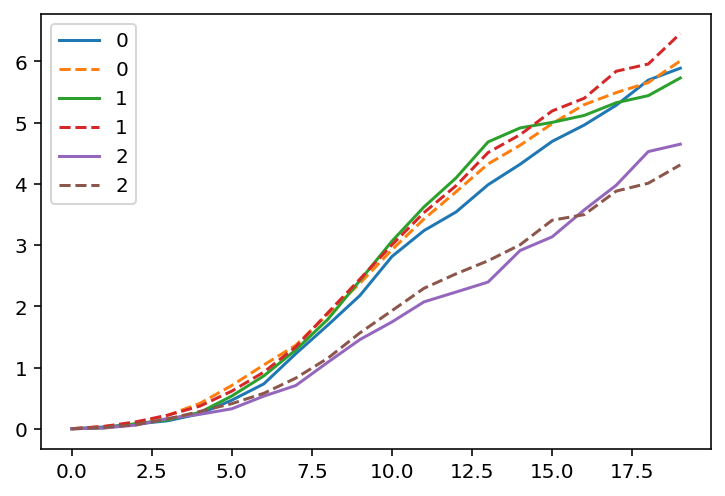

In [33]:
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()


### 입력으로 20개가 아닌 일부 샘플만 사용하는 경우

In [35]:
X.shape

(200, 20)

In [36]:
# 일부 샘플 수
n_interval = 5
xn = np.int(n_steps/n_interval)
x_sample = [xn*(i+1)-1 for i in range(n_interval)]
x_sample

[3, 7, 11, 15, 19]

In [37]:
# 해당 샘플 컬럼만으로 입력 재구성
X_part = X[:,x_sample]
# 앞 부분의 일부 샘플만 사용하는 경우
print(X_part.shape)
# X_part[:3]

(200, 5)


In [38]:
# 앞 부분의 일부(10개) 샘플만 사용하는 경우
# X_part = X[:,:10]

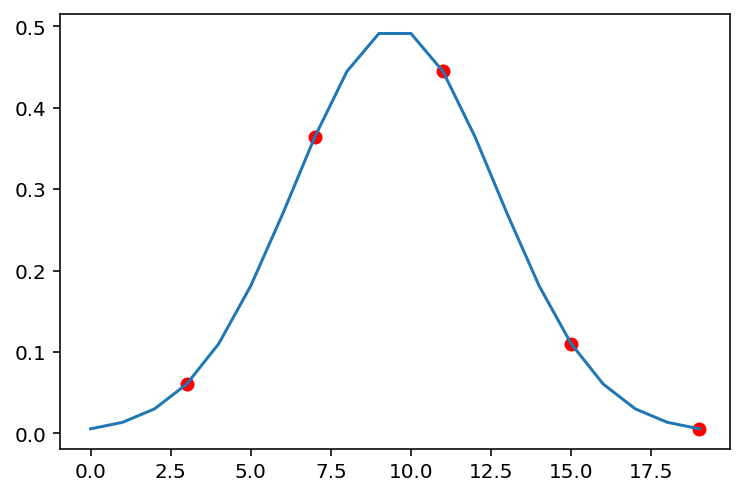

In [39]:
plt.plot(X[1])
plt.scatter(x_sample, X_part[1], c='r')
# plt.plot(X_part[1], c='r', marker='o')

### 성능 비교

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)

In [41]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.52094317260412

In [42]:
X_train.shape

(150, 5)

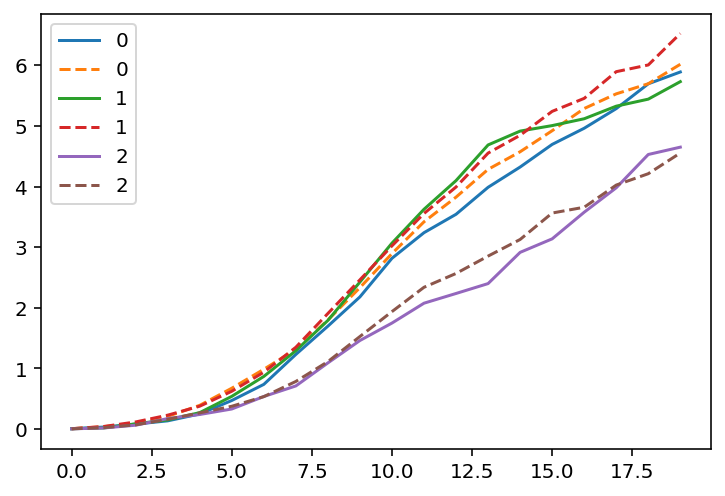

In [43]:
y_pred = rfr.predict(X_test)
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

In [44]:
X_test.shape

(50, 5)

- (과제1) 10개가 아니라 5개의 중간 샘플만 입력으로 사용하면?
- (과제2) 앞의 20% 데이터만 사용해서 전체 출력(50개)를 예측하고 성능을 보면?
- (참고) 랜덤포레스트 또는 MLP를 주로 사용한다
 - extrapolation이 필요한 경우는 선형계열 모델인 MLP가 트리계열(랜덤퍼레스트)보다 우수
 - 아주 복잡하고 과거를 기억하는 요소가 많은 경우는 RNN (LSTM)을 사용한다
- (추가 과제) MLP를 이용하는 모델 작성

# 다중 분류
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - y_multi = np.c_[y1, y2] 또는
 - y_multi = np.stack((y1,y2)).T 사용
 
## kNN, 결정트리, 랜덤 포레스트가 지원
- 다항 로지스틱스를 사용하는 경우
 - model = LogisticRegression(multi_class=“multinomial”, solver = “lbgfs”, C=10)